In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [104]:
#using the recording from March 2nd, after 2016 Finalists had ended their year of eligibility for the PMF program.
df=pd.read_csv("FinalistsDetailed1617.csv",encoding = "ISO-8859-1")

In [3]:
df.head(2)

,Academic Institution,Advanced Degree,Vet Pref,Status,Class
0,"UNIVERSITY OF CALIFORNIA, BERKELEY",Policy Analysis,No,-,2017
1,GEORGETOWN UNIVERSITY,Defense/Terrorism,Yes,Appointed,2016


Simple bit of code to plot the number of 2016 Finalists who were recorded as appointed.

309 of 542 are appointed, for a percentage of 0.570110701107
233 of 542 are not appointed, for a percentage of 0.429889298893


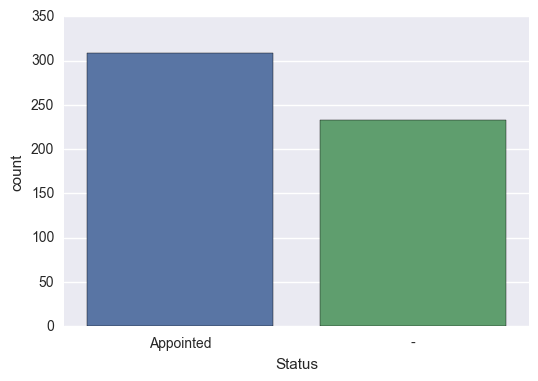

In [25]:
a=df.loc[df2.loc[:,'Class']==2016,'Status'].value_counts()
print( "%s of %s are appointed, for a percentage of %s" %(a['Appointed'], (a['-']+a['Appointed']), a['Appointed']/(a['-']+a['Appointed'])))
print( "%s of %s are not appointed, for a percentage of %s" %(a['-'], (a['-']+a['Appointed']), a['-']/(a['-']+a['Appointed'])))
sns.countplot(x='Status',data=df.loc[df.loc[:,'Class']==2016,:]);

The dataframe df has a row for every finalist. Instead, I want a dataframe with every row for a unique degree.

In [4]:
df2=pd.DataFrame(); #new dataframe for advanced degrees
df2['Degree']=df.loc[:,'Advanced Degree'].value_counts().index; #first column==advanced degree names
df2['Total']=df.loc[:,'Advanced Degree'].value_counts().values;
#this next section makes 2 columns for 2016 and 2017 counts of advanced degrees
ad2016=df.loc[df.loc[:,'Class']==2016,'Advanced Degree'].value_counts()
ad2017=df.loc[df.loc[:,'Class']==2017,'Advanced Degree'].value_counts()
df2['Finalists 2016']=0
df2['Finalists 2017']=0
for elm in ad2016.index:
    df2.loc[df2.loc[:,'Degree']==elm,'Finalists 2016']=ad2016[elm]
for elm in ad2017.index:
    df2.loc[df2.loc[:,'Degree']==elm,'Finalists 2017']=ad2017[elm]
#can look at the ratio of degrees from one year to the next:
df2['Ratio']=df2['Finalists 2017']/df2['Finalists 2016']
#but because the number of finalists in each year is different, this raio should be scaled:
c=df.loc[:,'Class'].value_counts()
c[2017]/c[2016]
df2['Ratio2']=df2['Ratio']-c[2017]/c[2016]
#then I can also scale the number of finalists in the 2016 record as if there had been the same number of finalists
df2['Finalists 2016 scaled']=df2['Finalists 2016']*c[2017]/c[2016]
#and look at the difference to determine which degrees have seen the most change:
df2["Finalists 2017 vs scaled 2016"]=df2['Finalists 2017']-df2['Finalists 2016 scaled']

In [26]:
df2.head()

,Degree,Total,Finalists 2016,Finalists 2017,Ratio,Ratio2,Finalists 2016 scaled,Finalists 2017 vs scaled 2016
0,International Disciplines,145,86,59,0.686047,-0.083326,66.166052,-7.166052
1,Law (JD or other law degree),110,50,60,1.200000,0.430627,38.468635,21.531365
2,Public Administration,74,41,33,0.804878,0.035505,31.544280,1.455720
3,Policy Analysis,66,37,29,0.783784,0.014411,28.466790,0.533210
4,Business Management/Administration,55,40,15,0.375000,-0.394373,30.774908,-15.774908


Plotting the number of finalists per degree over 2016 and 2017 classes:

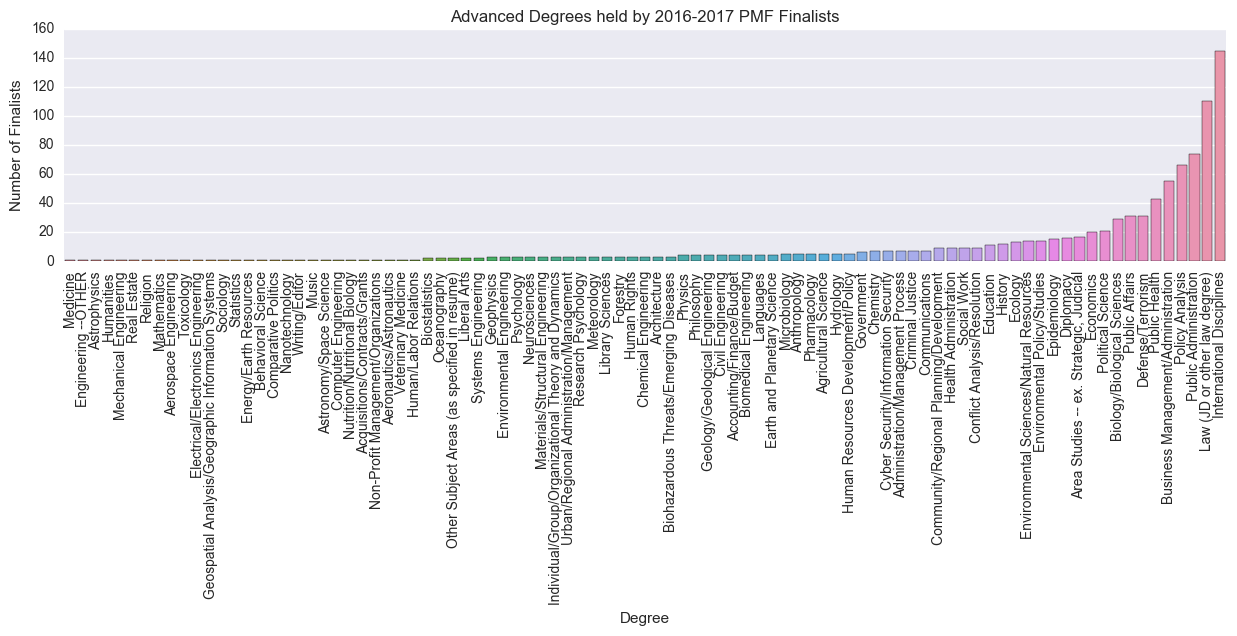

In [47]:
fig, axes = plt.subplots(figsize=(15,3));
axes=sns.barplot(x='Degree',y='Total',
            data=df2.loc[(df2.loc[:,'Total']>=1),:].sort_values('Total'))
plt.xticks(rotation=90);
plt.ylabel('Number of Finalists')
plt.title('Advanced Degrees held by 2016-2017 PMF Finalists');
plt.savefig('PMFdegrees1617.png',bbox_inches='tight')

Could be curious how many of those degrees are held by fewer than n finalists:

In [74]:
n=4
a=df2.Total
aT=len(a)
aTn=len(a[a<n])

print('Number of unique Advanced Degrees in the 2016-2017 Finalist list: %s'%aT)
print('Number of unique Degrees in the 2016-2017 Finalist list held by fewer than %s Finalists: %s'%(n,aTn))
print('Percent of unique Degrees held by fewer than %s Finalists: %s'%(n,round(aTn/aT*100,1)))

Number of unique Advanced Degrees in the 2016-2017 Finalist list: 91
Number of unique Degrees in the 2016-2017 Finalist list held by fewer than 4 Finalists: 48
Percent of unique Degrees held by fewer than 4 Finalists: 52.7


Also could be curious if the degree distribution follows a natural exp decay:

In [7]:
def expdecay(N0,L,x):
    Num=N0*np.exp(-L*x)
    return Num

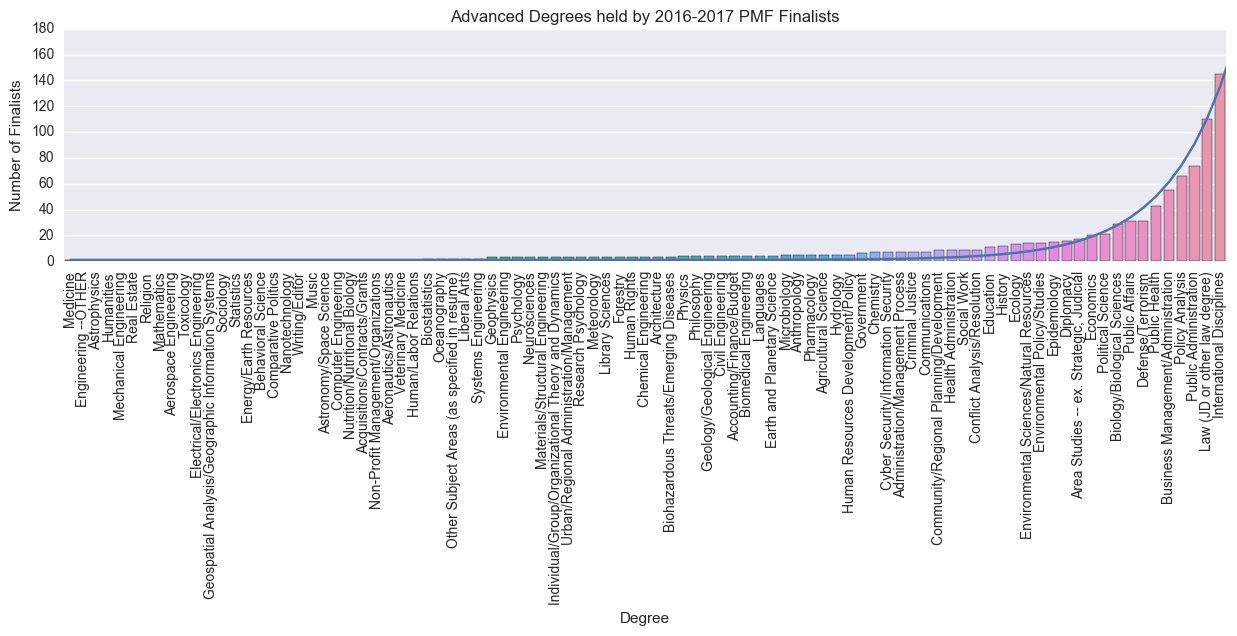

In [32]:
fig, axes = plt.subplots(figsize=(15,3));
axes=sns.barplot(x='Degree',y='Total',
            data=df2.loc[(df2.loc[:,'Total']>=1),:].sort_values('Total'))
plt.xticks(rotation=90);
plt.ylabel('Number of Finalists')
plt.title('Advanced Degrees held by 2016-2017 PMF Finalists');
x=range(0,92)
y=[];
for X in x:
    y.append(1+expdecay(200,.2,(92-X)))
plt.plot(x,y)

And looking at the change in scaled number of finalists for the more common degrees:

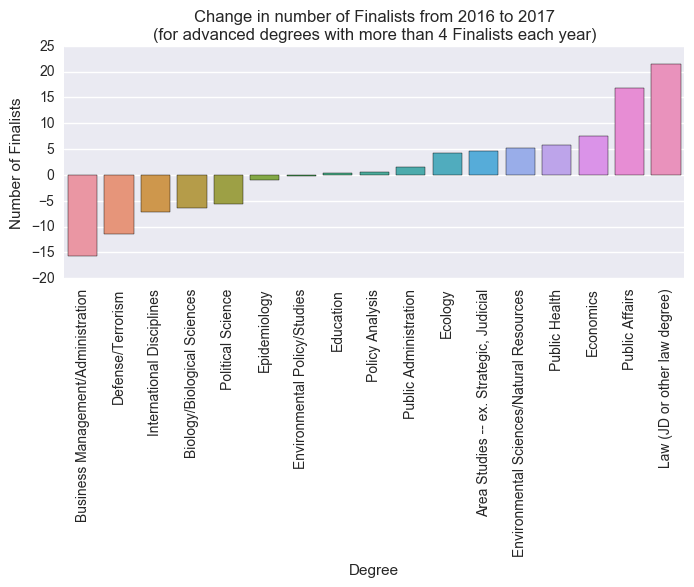

In [271]:
n=4;
m=n;
fig, axes = plt.subplots(figsize=(8,3));
axes=sns.barplot(x='Degree',y='Finalists 2017 vs scaled 2016',
            data=df2.loc[(df2.loc[:,'Finalists 2016']>n)&(
            df2.loc[:,'Finalists 2017']>m),:].sort_values('Finalists 2017 vs scaled 2016'))
plt.xticks(rotation=90);
plt.ylabel('Number of Finalists');
plt.xlabel('Degree');
plt.title('Change in number of Finalists from 2016 to 2017\n(for advanced degrees with more than %s Finalists each year)'%(n));
plt.savefig('ADchange2016to2017_%s.png'%(n),bbox_inches='tight')

In [83]:
a=df.loc[(df.loc[:,'Class']==2016)&(df.loc[:,'Status']=='Appointed'),'Advanced Degree'].value_counts()
b=df.loc[(df.loc[:,'Class']==2016)&~(df.loc[:,'Status']=='Appointed'),'Advanced Degree'].value_counts()

In [123]:
df_success=pd.DataFrame()
df_success['Advanced Degree 2016']=df.loc[(df.loc[:,'Class']==2016),'Advanced Degree'].value_counts().index
df_success['Total']=df.loc[(df.loc[:,'Class']==2016),'Advanced Degree'].value_counts().values
df_success['Appointed']=0
df_success['Not Appointed']=0
for degree in a.index:
    df_success.loc[df_success.loc[:,'Advanced Degree 2016']==degree,'Appointed']=a[degree]
for degree in b.index:
    df_success.loc[df_success.loc[:,'Advanced Degree 2016']==degree,'Not Appointed']=b[degree]
df_success['Difference']=df_success['Appointed']-df_success['Not Appointed']
df_success['Percent']=round(df_success['Appointed']/df_success['Total']*100,1)
df_success['Percent to Average']=df_success['Percent']-57.0

In [168]:
df_success['Average Expectation']=df_success['Total']*57/100
df_success['Performance Relative to Expectation']=df_success['Appointed']-df_success['Average Expectation']

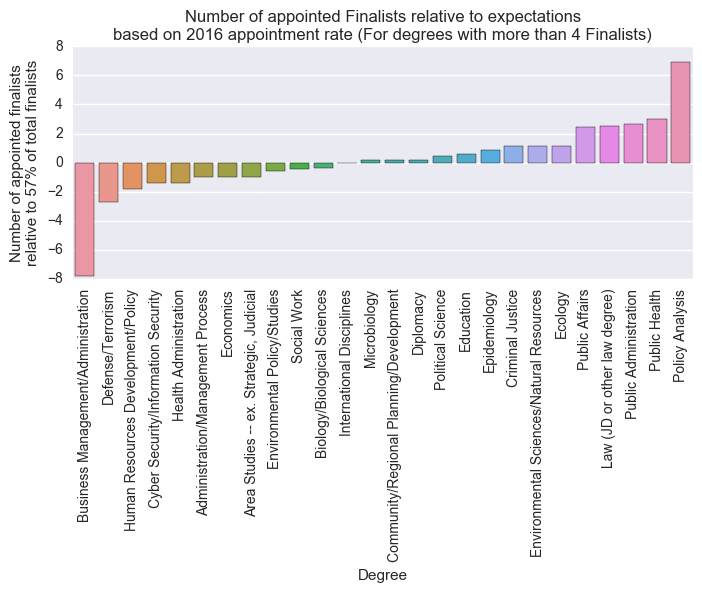

In [273]:
n=4;
m=n;
fig, axes = plt.subplots(figsize=(8,3));
#axes=sns.barplot(x='Advanced Degree 2016',y='Percent',
#            data=df_success.loc[(df_success.loc[:,'Total']>n),:].sort_values('Percent'))
axes=sns.barplot(x='Advanced Degree 2016',y='Performance Relative to Expectation',
            data=df_success.loc[(df_success.loc[:,'Total']>n),:].sort_values('Performance Relative to Expectation'))

plt.xticks(rotation=90);
plt.ylabel('Number of appointed finalists\nrelative to 57% of total finalists');
plt.xlabel('Degree');
plt.title('Number of appointed Finalists relative to expectations\nbased on 2016 appointment rate (For degrees with more than %s Finalists)'%(n));
plt.savefig('SuccessRate2016_%s.png'%(n),bbox_inches='tight')

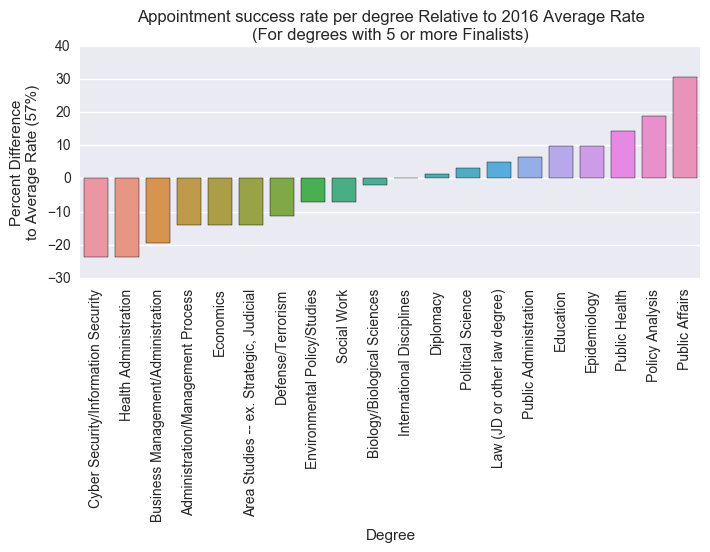

In [165]:
n=5;
m=n;
fig, axes = plt.subplots(figsize=(8,3));
#axes=sns.barplot(x='Advanced Degree 2016',y='Percent',
#            data=df_success.loc[(df_success.loc[:,'Total']>n),:].sort_values('Percent'))
axes=sns.barplot(x='Advanced Degree 2016',y='Percent to Average',
            data=df_success.loc[(df_success.loc[:,'Total']>n),:].sort_values('Percent'))

plt.xticks(rotation=90);
plt.ylabel('Percent Difference\nto Average Rate (57%)');
plt.xlabel('Degree');
plt.title('Appointment success rate per degree Relative to 2016 Average Rate\n(For degrees with %s or more Finalists)'%(n));


In [210]:
df_success['Relative to 2017']=0.0
for degree in df_success['Advanced Degree 2016']:
    #print(degree)
    a=list(df2.loc[df2.loc[:,'Degree']==degree,'Finalists 2017 vs scaled 2016'])
    #print(a[0])
    #print(df_success.loc[df_success.loc[:,'Advanced Degree 2016']==degree,'Relative to 2017'])
    df_success.loc[df_success.loc[:,'Advanced Degree 2016']==degree,'Relative to 2017']=a
    #print(df_success.loc[df_success.loc[:,'Advanced Degree 2016']==degree,'Relative to 2017'])

In [212]:
len(df_success)

78

In [220]:
a=len(df_success.loc[(df_success.loc[:,'Performance Relative to Expectation']<=0)&(
        df_success.loc[:,'Relative to 2017']<=0),:])
b=len(df_success.loc[(df_success.loc[:,'Performance Relative to Expectation']>0)&(
        df_success.loc[:,'Relative to 2017']>0),:])
(a+b)/78

0.6153846153846154

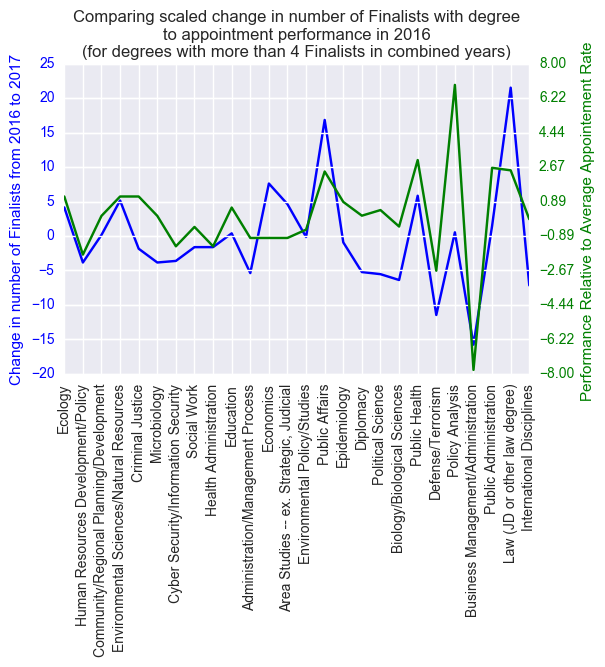

In [307]:
n=4
df_success2=df_success[df_success.loc[:,'Total']>n].sort_values('Total').copy()
df_success2.reset_index(inplace=True)
fig, ax1 = plt.subplots()
color1='blue'
color2='green'
ax1.plot(df_success2.index,df_success2['Relative to 2017'],color=color1)
ax1.set_ylabel('Change in number of Finalists from 2016 to 2017', color=color1)
ax1.tick_params('y', colors=color1)
plt.xticks(np.arange(min(df_success2.index), max(df_success2.index)+1., 1.0))
#ax1.set_xlabel(col)
ax1.set_xticklabels(df_success2['Advanced Degree 2016'],rotation=90)

ax2 = ax1.twinx()
ax2.plot(df_success2.index,df_success2['Performance Relative to Expectation'],color=color2)
ax2.set_ylabel('Performance Relative to Average Appointement Rate ', color=color2)
#ax2.yaxis.set_ticks(np.arange(0.,1.1, .1))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())));
ax2.tick_params('y', colors=color2)
plt.title('Comparing scaled change in number of Finalists with degree\nto appointment performance in 2016\n(for degrees with more than %s Finalists in combined years)'%(n));
plt.savefig('Performance_to_Acceptance_%s'%(n),bbox_inches='tight')

In [305]:
df_success

,Advanced Degree 2016,Total,Appointed,Not Appointed,Difference,Percent,Percent to Average,Average Expectation,Performance Relative to Expectation,Relative to 2017
0,International Disciplines,86,49,37,12,57.0,0.0,49.02,-0.02,-7.166052
1,Law (JD or other law degree),50,31,19,12,62.0,5.0,28.50,2.50,21.531365
2,Public Administration,41,26,15,11,63.4,6.4,23.37,2.63,1.455720
3,Business Management/Administration,40,15,25,-10,37.5,-19.5,22.80,-7.80,-15.774908
4,Policy Analysis,37,28,9,19,75.7,18.7,21.09,6.91,0.533210
5,Defense/Terrorism,24,11,13,-2,45.8,-11.2,13.68,-2.68,-11.464945
6,Public Health,21,15,6,9,71.4,14.4,11.97,3.03,5.843173
7,Biology/Biological Sciences,20,11,9,2,55.0,-2.0,11.40,-0.40,-6.387454
8,Political Science,15,9,6,3,60.0,3.0,8.55,0.45,-5.540590
9,Diplomacy,12,7,5,2,58.3,1.3,6.84,0.16,-5.232472
